# Tarea 1

## Ejercicio 2

De la base _data_schools_ obtener el error estándar con Bootstrap de las variables de la base.

Recordemos que tienen que simular _N_ Muestras Boostrap con tamño _n_. Luego, el otro ejercicio es que lo hagan con _n-1_.

Grafique los histogramas de las correlaciones.

Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa.

### Parte 1: el error estándar

Utilizaremos _sqldf_, así que antes se debe instalar de ser necesario.

In [35]:
pip install sqldf

Note: you may need to restart the kernel to use updated packages.


In [36]:
#import sqlite3
import sqldf
import pandas as pd
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr
import pandas as pd

Vamos a empezar a explorar las bases de datos 

In [69]:
ruta = "./data/"
bd="data_schools.xlsx"
bd_escuelas=pd.read_excel(ruta+bd)
bd_escuelas.head()

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09


In [39]:
#Seleccionamos aleatoriamente 15 escuelas y se les colocara un 1 a las escuelas seleccionadas
escuelas_random=bd_escuelas.sample(n=15,random_state=9998)#[["escuela"]]
escuelas_random["f_seleccion"]=1
print(escuelas_random)

    escuela  LSAT   GPA  f_seleccion
37       38   606  3.20            1
51       52   580  3.07            1
75       76   608  3.16            1
5         6   576  3.39            1
73       74   565  3.15            1
21       22   614  3.19            1
57       58   631  3.21            1
10       11   558  3.11            1
35       36   572  2.88            1
39       40   535  2.98            1
47       48   562  3.19            1
68       69   598  3.20            1
61       62   637  3.33            1
76       77   595  3.19            1
36       37   615  3.37            1


In [40]:
#Vamos a sacar las correlaciones entre las 2 pruebas de las 15 escuelas seleccionadas aleatoriamente
corr, _ = spearmanr(escuelas_random.LSAT, escuelas_random.GPA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.648


In [41]:
#igualmente obtenemos las correlaciones entrelas pruebas pero con la muestra total
corr1, _ = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.648


In [42]:
#pasamos las x que son los resultados de "LSAT" a un array
X = bd_escuelas[["LSAT"]]
x=X.to_numpy().reshape(-1)
x

array([622, 542, 579, 653, 606, 576, 620, 615, 553, 607, 558, 596, 635,
       581, 661, 547, 599, 646, 622, 611, 546, 614, 628, 575, 662, 627,
       608, 632, 587, 581, 605, 704, 477, 591, 578, 572, 615, 606, 603,
       535, 595, 575, 573, 644, 545, 645, 651, 562, 609, 555, 586, 580,
       594, 594, 560, 641, 512, 631, 597, 621, 617, 637, 572, 610, 562,
       635, 614, 546, 598, 666, 570, 570, 605, 565, 686, 608, 595, 590,
       558, 611, 564, 575])

In [43]:
#obtenemos la media
desEst=np.std(x)
(desEst)
np.mean(x)

597.5487804878048

In [ ]:
#vamos a crear una funcion que haga lo que necesitamos(Boostrap)
"""nuestra funcion sacara el vector de todas las correlaciones en los remuestreos y recive :
*N que es el numero de remuestreos boostrap
*n es el numero de muestras aleatorias que vamos a tomar
*col1, col2 son los datos de las pruebas 'LSAT'y 'GPA' respectivamente
*remplazo es solo una variable auxiliar que nos ayudara a ver si las muestras n van o no a tener remplazo


In [44]:
def vec_corr(N,num,bd,col1,col2,remplazo):
    cor_boost=np.array([])
    for i in range(0,N):
        bd_random=bd.sample(n=num,replace=remplazo)
        corr,_=spearmanr(bd_random[col1],bd_random[col2])
        cor_boost = np.append(cor_boost,corr)
    return cor_boost    

In [45]:
#Aplicamos la funcion para nustros datos remuestreando mil veces 15 datos con o sin reemplazo
cor_boost=vec_corr(1000,15,bd_escuelas,'LSAT','GPA',False)

In [46]:
#Este es el promedio de las correlaciones
np.mean(cor_boost)

0.7204089857390926

In [47]:
#Desviacion estandar de las correlaciones
np.std(cor_boost)

0.13433494368413765

In [ ]:
# esta funcion nos ayuda a sacar el histograma de todas las correlaciones obtenidas
""" donde el area delimitado por las lineas azules representan el 95% de las observaciones,
la linea verde es en donde esta la media de las correlaciones sin boostrap
la linea negra es la media de las correlciones aplicando bootstrap
"""

In [48]:
def hist_corr(cor_boost,corr1):
    fig, ax = plt.subplots(figsize=(9,6))
    hist(cor_boost,bins=50,alpha=0.5,edgecolor="white",label="Corr Boostrap")
    axvline(x=corr1,color='green', linestyle='--',linewidth=3,label="Correlacion sin boostrap")
    axvline(x=np.mean(cor_boost),color='black', linestyle='--',linewidth=3,label="correlación Boostrap$")

    axvline(percentile(cor_boost,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
    axvline(percentile(cor_boost,97.5),color="blue",linestyle="--",linewidth=2) 
    show()
    print("Correlacion sin Bootsrap:", corr1)
    print("Promedio de la Correlacion de las muestras Bootstrap:", np.mean(cor_boost))
    print("(", percentile(cor_boost,2.5),",",percentile(cor_boost,97.5),")")

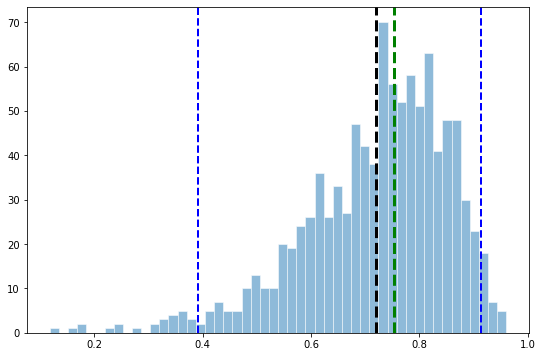

Correlacion sin Bootsrap: 0.7526621356232132
Promedio de la Correlacion de las muestras Bootstrap: 0.7204089857390926
( 0.3925029072379058 , 0.9130824739326255 )


In [49]:
hist_corr(cor_boost,corr1)

In [50]:
#El otro ejercicio que es con n-1

In [51]:
simul=1000
cor_boost2= np.array( [ ])
for i in range(0,simul):
    escuelas_random=bd_escuelas.sample(n=15)
    muestra_muestra=escuelas_random.sample(n=14)
    corr, _ = spearmanr(muestra_muestra.LSAT, muestra_muestra.GPA)
    cor_boost2 = np.append(cor_boost2,corr)

In [52]:
np.mean(cor_boost2)

0.7200289444367783

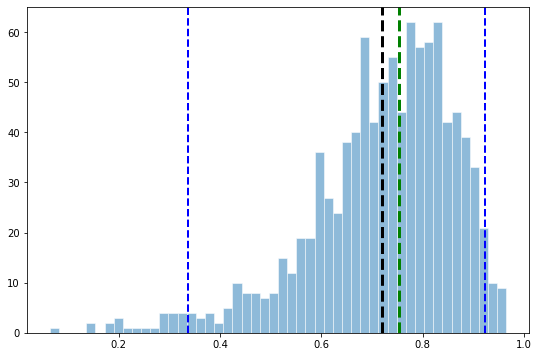

Correlacion sin Bootsrap: 0.7526621356232132
Promedio de la Correlacion de las muestras Bootstrap: 0.7200289444367783
( 0.3366246138004544 , 0.9219160047142793 )


In [53]:
hist_corr(cor_boost2,corr1)

In [54]:
#Ahora con una muestra de tamaño n igual al tamaño del numero de escuelas

In [55]:
simul=1000
cor_boost3=vec_corr(1000,len(bd_escuelas),bd_escuelas,'LSAT','GPA',True)

In [56]:
np.mean(cor_boost3)

0.743727687094002

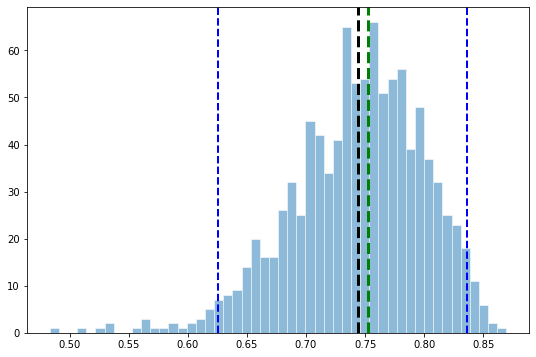

Correlacion sin Bootsrap: 0.7526621356232132
Promedio de la Correlacion de las muestras Bootstrap: 0.743727687094002
( 0.6257671942747878 , 0.8361477866155853 )


In [57]:
#Obtengamos el Histograma de los correlaciones de las n muestras bootstrap
hist_corr(cor_boost3,corr1)

In [58]:
cor_boost4=np.array([])
for i in range(0,len(bd_escuelas)-1):
    escuelas_random=bd_escuelas.sample(len(bd_escuelas)-i)
    corr, _ = spearmanr(escuelas_random.LSAT, escuelas_random.GPA)
    cor_boost4 = np.append(cor_boost4,corr)

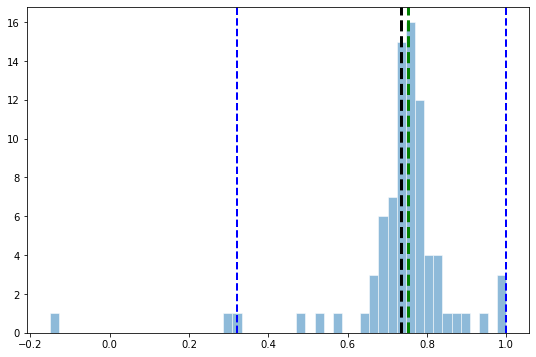

Correlacion sin Bootsrap: 0.7526621356232132
Promedio de la Correlacion de las muestras Bootstrap: 0.7342060012693656
( 0.32177348551360846 , 0.9999999999999999 )


In [59]:
hist_corr(cor_boost4,corr1)

In [60]:
#determinar la mejor N: 
stds_corr=np.array([])
eNes=np.array([])
for i in range (50,201):
    std_aux=np.std(vec_corr(i,15,bd_escuelas,'LSAT','GPA',False))
    stds_corr=np.append(stds_corr,std_aux)
    eNes=np.append(eNes,i)

In [61]:
predataframe={'N':eNes, 'desvs_estandar':stds_corr}

In [62]:
dataframe=pd.DataFrame(predataframe)
dataframe.head()

,N,desvs_estandar
0,50.0,0.136355
1,51.0,0.122264
2,52.0,0.101095
3,53.0,0.123731
4,54.0,0.131811


In [63]:
query ="""
       select N as Nmin,min(desvs_estandar)
       from dataframe where N>5.0 
       """
sqldf.run(query)

,Nmin,min(desvs_estandar)
0,52.0,0.101095


In [64]:
#otra manera
miniN=pd.DataFrame(vec_corr(300,15,bd_escuelas,'LSAT','GPA',False))


In [65]:
stds_corr=np.array([])
eNes=np.array([])
for i in range(50,200):
    std_aux=np.std(miniN.sample(n=i).transpose().to_numpy()[0])
    stds_corr=np.append(stds_corr,std_aux)
    eNes=np.append(eNes,i)

In [66]:
predataframe={'N':eNes, 'desvs_estandar':stds_corr}

In [67]:
dataframe=pd.DataFrame(predataframe)
dataframe.tail()

,N,desvs_estandar
145,195.0,0.130378
146,196.0,0.125614
147,197.0,0.126618
148,198.0,0.118962
149,199.0,0.133920


In [68]:
query ="""
       select N as Nmin,min(desvs_estandar)
       from dataframe  
       """
sqldf.run(query)

,Nmin,min(desvs_estandar)
0,51.0,0.103978
